---
---

Importowanie bibliotek.

---
---

In [1]:
import os
import io
import string
import pandas as pd
import numpy as np
from sklearn import linear_model
# %matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files

---
---

Własnoręcznie zaimplmentowana klasa Perceptron.

---
---

In [2]:
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

---
---

Kod klasy SLP (Single Layer Perceptron).

---
---

> `def __init__(self, eta=0.05, n_iter=10, random_state=1)` Konstruktor klasy SLP.

**Przyjmuje:**

*   `eta` - stała zmienna przez którą update'y we wszystkich Perceptronach są pomnożone

*   `n_iter` - stała zmienna oznaczająca liczbę iteracji podczas których wagi Perceptronów są dostosywane w metodzie `fit()`

*   `random_state` - stała zmienna używana do losowej generacji początkowych wag w Perceptronach

**Zwraca:**

*   Jest konstruktorem klasy SLP.

---
---

> `def fit(self, X, y)` Tworzy wewnętrznie Perceptron dla każdej litery i je trenuje na danych.

**Przyjmuje:**

*   `X` - Zbiór przykładowych danych na których uczone są wszystkie Perceptrony

*   `y` - Zbiór poprawnych odpowiedzi do przykładowych danych

**Zwraca:**

*   Nic, jedynie uczy perceptrony.

---
---

> `def predict(self, X):` Zwraca przewidywane odpowiedzi Perceptronów dla danego zbioru danych.

**Przyjmuje:**

*   `X` - Zbiór danych dla których ma podać przewidywane odpowiedzi

**Zwraca:**

*   2-wymiarową tablicę przewidywanych odpowiedzi

---
---

> `def misclassified(self, X, y)` Porównuje przewidywane odpowiedzi dla danego zbioru danych do poprawynch odpowiedzi.

**Przyjmuje:**

*   `X` - Zbiór danych dla których ma sprawdzić trafność przewidywanych odpowiedzi

*   `y` - Zbiór oczekiwanych odpowiedzi

**Zwraca:**

*   `Intger` oznaczający ilość błędnych przewidywań

---
---

> `def show(self, X):` Rysuje podane dane w formie wykresów.

**Przyjmuje:**

*   `X` - Zbiór danych które chcemy wydrukować

**Zwraca:**

*   Nic nie zwraca, natomiast rysuje podane dane w formie 10-ciu wykresów złożony z czarnych i białych pól o rozmiarach 5x7

---
---

In [3]:
class SLP:
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.r_state = random_state
    self.perceptrony = []
    self.errors_ = []

  def fit(self, X, y):
    self.perceptrony = []
    [ self.perceptrony.append(Perceptron(eta=self.eta, n_iter=self.n_iter,
                                        random_state=self.r_state))
    for i in range(len(y[0])) ]
    [ self.perceptrony[i].fit(X, y[i])
    for i in range(len(y[0])) ]

    [ self.errors_.append(self.perceptrony[i].errors_)
    for i in range(len(y[0])) ]
    self.errors_ = [ sum([self.errors_[i][j] for i in range(len(y[0]))])
    for j in range(len(y[0])) ]

  def predict(self, X):
    out = []
    for i in range(len(self.perceptrony)):
      out.append(self.perceptrony[i].predict(X))
    out = np.array(out)
    out = out.T
    return out

  def misclassified(self, X, y):
    predicted = self.predict(X)
    misses = 0
    for i in range(len(predicted)):
      for j in range(len(predicted[i])):
        if predicted[i][j] != y[i][j]:
          misses += 1
    return misses

  def show(self, X):
    fig, axis = plt.subplots(nrows=2, ncols=5)
    for i in range(len(X)):
      character = np.reshape(X[i], (7,5))
      axis[i//5][i%5].imshow(character, cmap='binary')
    fig.subplots_adjust(wspace=1, hspace=-0.5)
    plt.show()

---
---

Utworzono obiekt klasy SLP.

---
---

In [4]:
net = SLP()

---
---

Pobrano plik `letters.data` do colaba, następnie go sparsowano do zbiorów X i y zawierających dane o indeksach:

1, 4, 5, 8, 11, 12, 18, 22, 23, 25

---
---

In [5]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header=None)

indexy = [1, 4, 5, 8, 11, 12, 18, 22, 23, 25]
# print([string.ascii_uppercase[i] for i in indexy])  # <- litery które mam

X = df.iloc[indexy, 0:35].values
X = np.array(X)

y_tmp = df.iloc[indexy, 35:61].values
y = []
for line in y_tmp:
  arr = []
  for ind in range(len(line)):
    for i in indexy:
      if ind == i:
        arr.append(line[ind])
  y.append(arr)
y = np.array(y)

Saving letters.data to letters.data


---
---

Wyświetlenie graficzne danych z indywidualnego zbioru X.

---
---

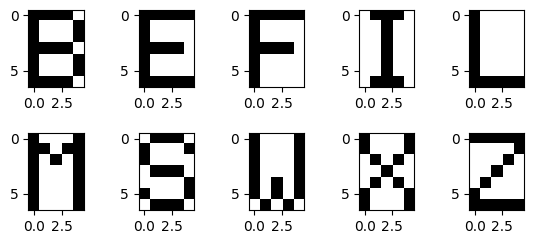

In [6]:
net.show(X)

---
---

Przeprowadzenie ucznia modelu za pomocą wywołania `fit(X, y)`.

---
---

In [7]:
net.fit(X, y)

---
---

Wyświetlenie wyniku `predict()` na zbiorz uczącym.

---
---

In [8]:
print(net.predict(X))

[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]]


---
---

Wyświetlenie zawartości `errors_`.

---
---

In [9]:
print(net.errors_)

[33, 16, 3, 2, 1, 0, 0, 0, 0, 0]


---
---

Wyświetlenie wyniku `misclassified()` na zbiorze uczącym.

---
---

In [10]:
print(net.misclassified(X, y))

0


---
---

Utworzenie uszkodzonych w 5%, 15% i 40% zbiorów danych ze zbioru X za pomocą funkcji `damage()`.

---
---

In [11]:
def damage(X, percent, seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)
  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1], count, replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel]*=-1
  return result

damaged5 = damage(X, 5)
damaged15 = damage(X, 15)
damaged40 = damage(X, 40)

---
---

Wyświetlenie graficznie danych z każdego uszkodzonego zbioru oraz wyników predict i misclassified.

---
---

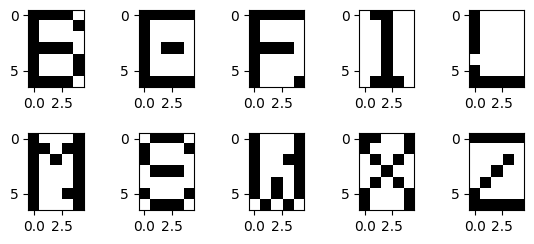

[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
5


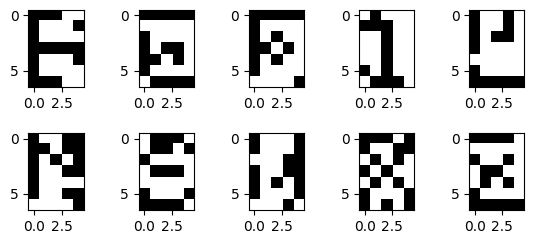

[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1  1 -1 -1 -1 -1  1]]
7


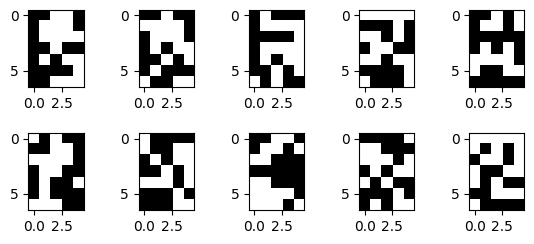

[[ 1  1  1 -1  1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1  1  1  1]
 [-1  1 -1  1  1  1 -1 -1 -1  1]
 [-1  1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1 -1  1  1  1 -1  1  1]]
31


In [12]:
net.show(damaged5)
print(net.predict(damaged5))
print(net.misclassified(damaged5, y))

net.show(damaged15)
print(net.predict(damaged15))
print(net.misclassified(damaged15, y))

net.show(damaged40)
print(net.predict(damaged40))
print(net.misclassified(damaged40, y))